In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = sns.load_dataset('titanic')


df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Step 1: Data Inspection
# I need to understand what my data looks like (rows, columns, data types)

print("--- Shape of the dataset ---")
print(df.shape)  # Returns (rows, columns)

print("\n--- Basic Information ---")
df.info()  # This helps me see which columns have null values

print("\n--- Statistical Summary ---")
df.describe()  # Gives mean, std, min, max for numerical columns

--- Shape of the dataset ---
(891, 15)

--- Basic Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

--- Statisti

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observation: The dataset has 891 rows and 15 columns. I can see that age has about 177 missing values, and deck is missing way too much data (over 600 nulls). I'll need to fix these in the cleaning step.

In [4]:
# Step 2: Data Cleaning

# Check for missing values before cleaning
print("Missing values before cleaning:")
print(df.isnull().sum())

print("\n--- Fixing Missing Values ---")
# 1. 'age' has missing values. I'll fill them with the median age (better than mean because of outliers).
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

# 2. 'deck' has too many missing values to be useful, so I will drop the entire column.
df.drop(columns=['deck'], inplace=True)

# 3. For 'embarked' and 'embark_town', there are only 2 missing rows. I'll just drop those specific rows.
df.dropna(subset=['embarked', 'embark_town'], inplace=True)

# Check duplicates
print("\n--- Handling Duplicates ---")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates}")

# Remove duplicates to ensure data quality
df.drop_duplicates(inplace=True)

# Final check to make sure everything is clean
print("\nData after cleaning:")
print(df.isnull().sum())
print(f"New shape of dataset: {df.shape}")

Missing values before cleaning:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

--- Fixing Missing Values ---

--- Handling Duplicates ---
Number of duplicate rows found: 116

Data after cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64
New shape of dataset: (773, 14)


/tmp/ipython-input-1542141608.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)


/tmp/ipython-input-2327297190.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='pastel')


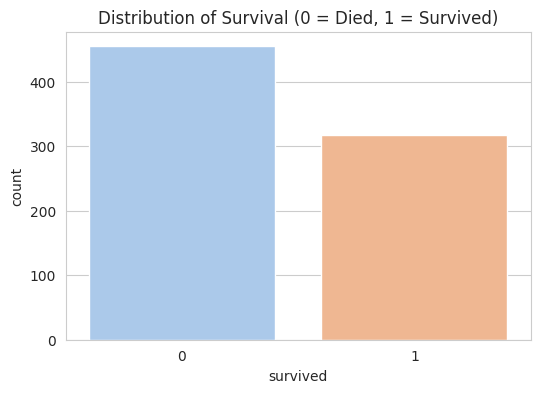

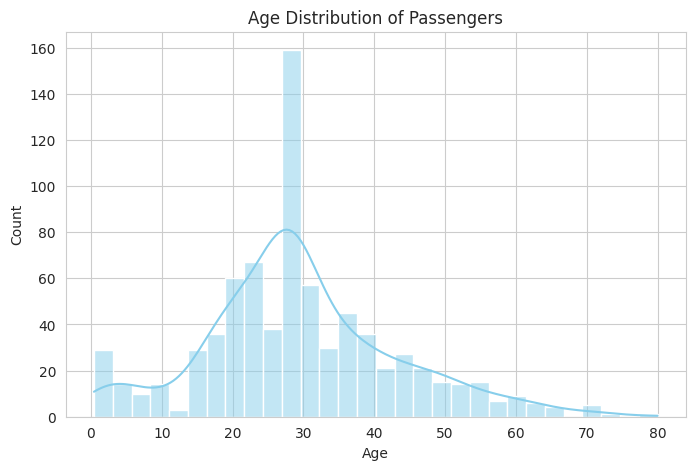

/tmp/ipython-input-2327297190.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='survived', data=df, palette='muted')


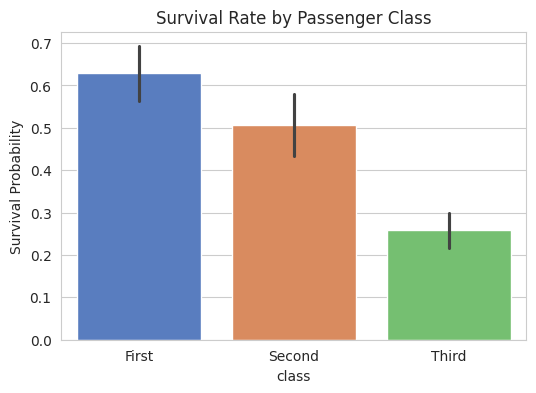

In [5]:
# Step 3: Data Visualization
# Creating charts to find patterns in survival

# Set the style for seaborn to make plots look nice
sns.set_style("whitegrid")

# 1. Survival Rate (Countplot)
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=df, palette='pastel')
plt.title('Distribution of Survival (0 = Died, 1 = Survived)')
plt.show()

# 2. Age Distribution (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, color='skyblue', bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.show()

# 3. Class vs. Survival (Barplot)
# Does money buy safety? Let's check if 1st class survived more.
plt.figure(figsize=(6, 4))
sns.barplot(x='class', y='survived', data=df, palette='muted')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Probability')
plt.show()